In [464]:
## import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics

In [465]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [466]:
## allow all columns in view
pd.set_option('display.width', 1200)
pd.set_option('display.max_columns', None)

In [467]:
## load dataset
data = pd.read_csv('M1_final.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [468]:
## getting info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [469]:
## change Dew Point Dtype to integer
data["Dew Point"] = data["Dew Point"].astype("int64")
data['Dew Point'].dtype

dtype('int64')

In [470]:
## checking for missing values
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [471]:
# determining the mode of variable Wind dtype: object
data['Wind'].value_counts()

Wind
W       3273
NW      3173
NNW     2570
WSW     2567
N       2453
SW      2354
WNW     2145
S       1879
SSW     1632
NNE     1280
ENE     1124
E       1068
NE      1044
CALM     835
ESE      466
SE       345
SSE      315
VAR      295
Name: count, dtype: int64

In [472]:
## replacing missing values with mode for the selected column for better analysis

data["Wind"] = data["Wind"].fillna(value='W', limit=1)
data["Wind"].count

<bound method Series.count of 0        W
1        W
2        W
3        W
4        W
        ..
28815    N
28816    N
28817    N
28818    N
28819    N
Name: Wind, Length: 28820, dtype: object>

In [520]:
## confirming the isnull values after replacement
data.isnull().sum()

MONTH               0
DAY_OF_MONTH        0
DAY_OF_WEEK         0
DEP_DELAY           0
CRS_ELAPSED_TIME    0
DISTANCE            0
CRS_DEP_M           0
DEP_TIME_M          0
CRS_ARR_M           0
Temperature         0
Dew Point           0
Humidity            0
Wind Speed          0
Wind Gust           0
Pressure            0
sch_dep             0
sch_arr             0
TAXI_OUT            0
dtype: int64

In [474]:
## statistical summary of the dataset
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


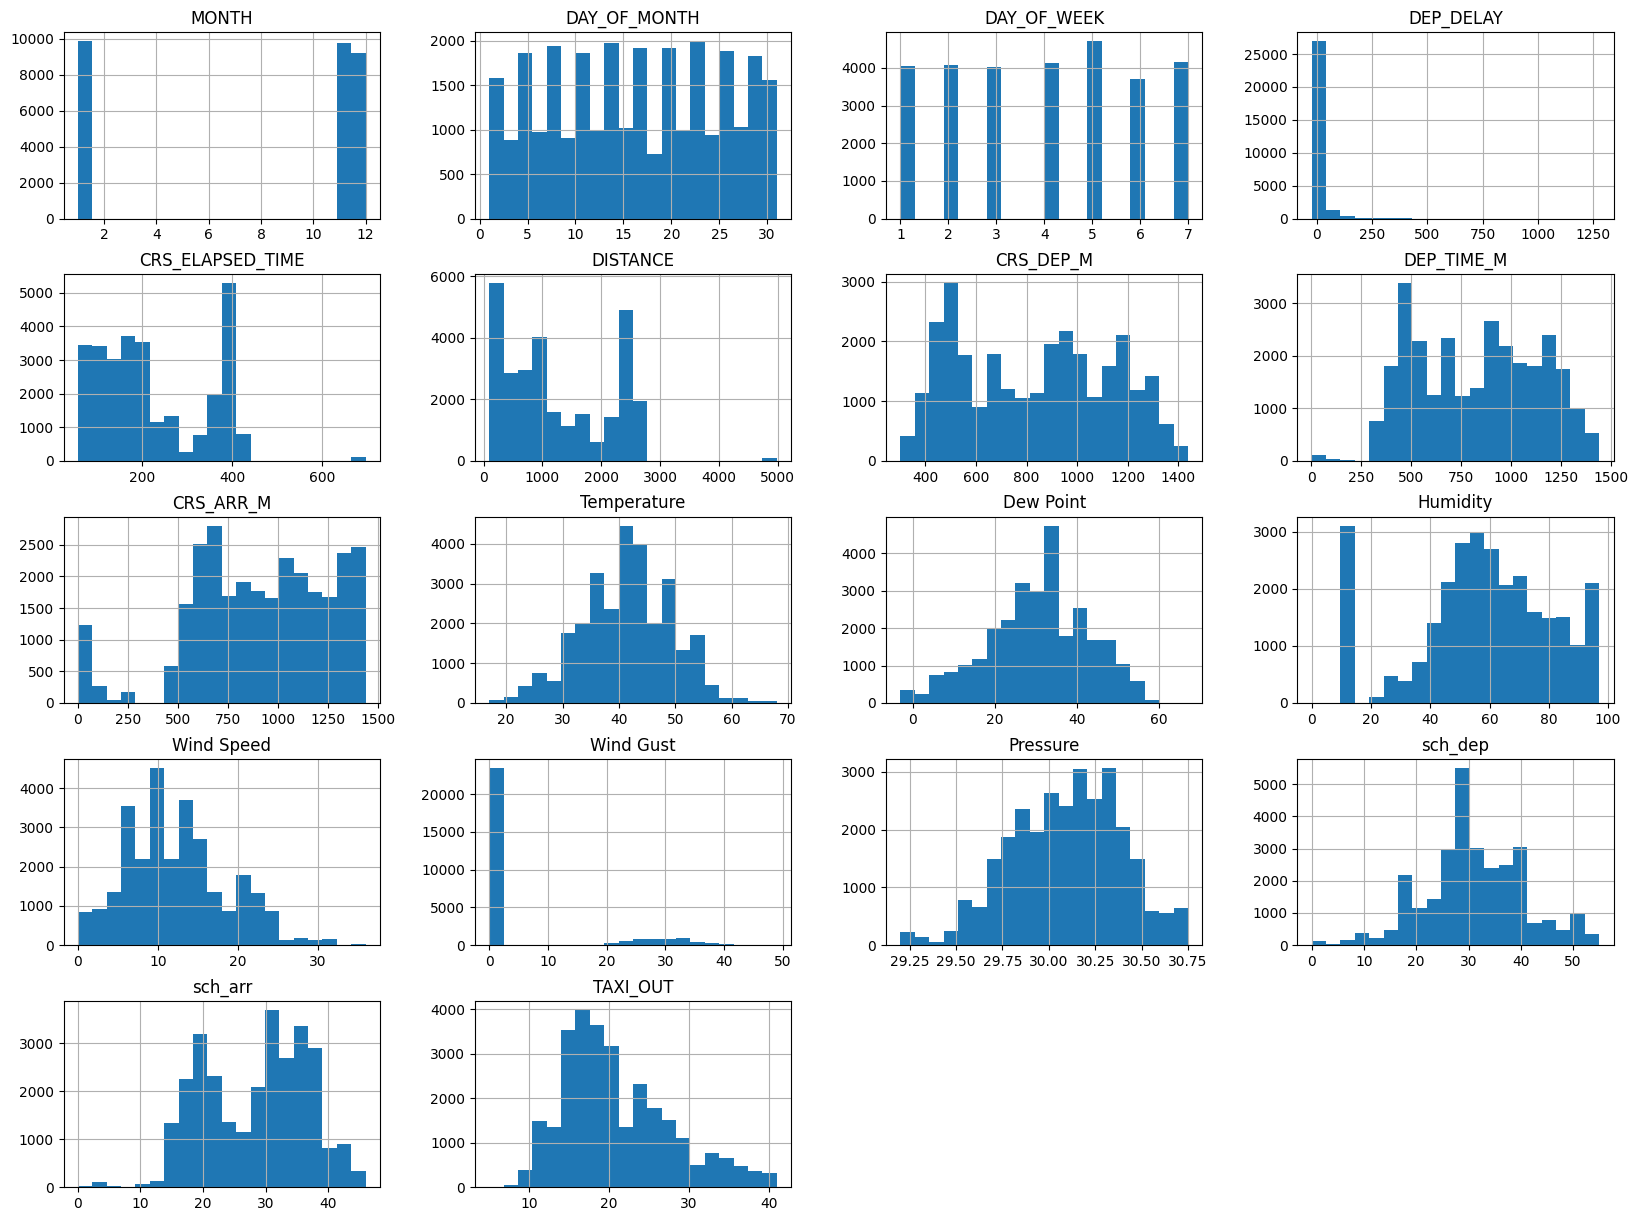

In [475]:
## calling the histogram method on the whole dataset
data.hist(bins=20, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='CRS_DEP_M', ylabel='CRS_DEP_M'>,
        <Axes: xlabel='CRS_ARR_M', ylabel='CRS_DEP_M'>,
        <Axes: xlabel='DEP_TIME_M', ylabel='CRS_DEP_M'>,
        <Axes: xlabel='CRS_ELAPSED_TIME', ylabel='CRS_DEP_M'>,
        <Axes: xlabel='DISTANCE', ylabel='CRS_DEP_M'>],
       [<Axes: xlabel='CRS_DEP_M', ylabel='CRS_ARR_M'>,
        <Axes: xlabel='CRS_ARR_M', ylabel='CRS_ARR_M'>,
        <Axes: xlabel='DEP_TIME_M', ylabel='CRS_ARR_M'>,
        <Axes: xlabel='CRS_ELAPSED_TIME', ylabel='CRS_ARR_M'>,
        <Axes: xlabel='DISTANCE', ylabel='CRS_ARR_M'>],
       [<Axes: xlabel='CRS_DEP_M', ylabel='DEP_TIME_M'>,
        <Axes: xlabel='CRS_ARR_M', ylabel='DEP_TIME_M'>,
        <Axes: xlabel='DEP_TIME_M', ylabel='DEP_TIME_M'>,
        <Axes: xlabel='CRS_ELAPSED_TIME', ylabel='DEP_TIME_M'>,
        <Axes: xlabel='DISTANCE', ylabel='DEP_TIME_M'>],
       [<Axes: xlabel='CRS_DEP_M', ylabel='CRS_ELAPSED_TIME'>,
        <Axes: xlabel='CRS_ARR_M', ylabel='CRS_ELAPSED_TIME'>,
     

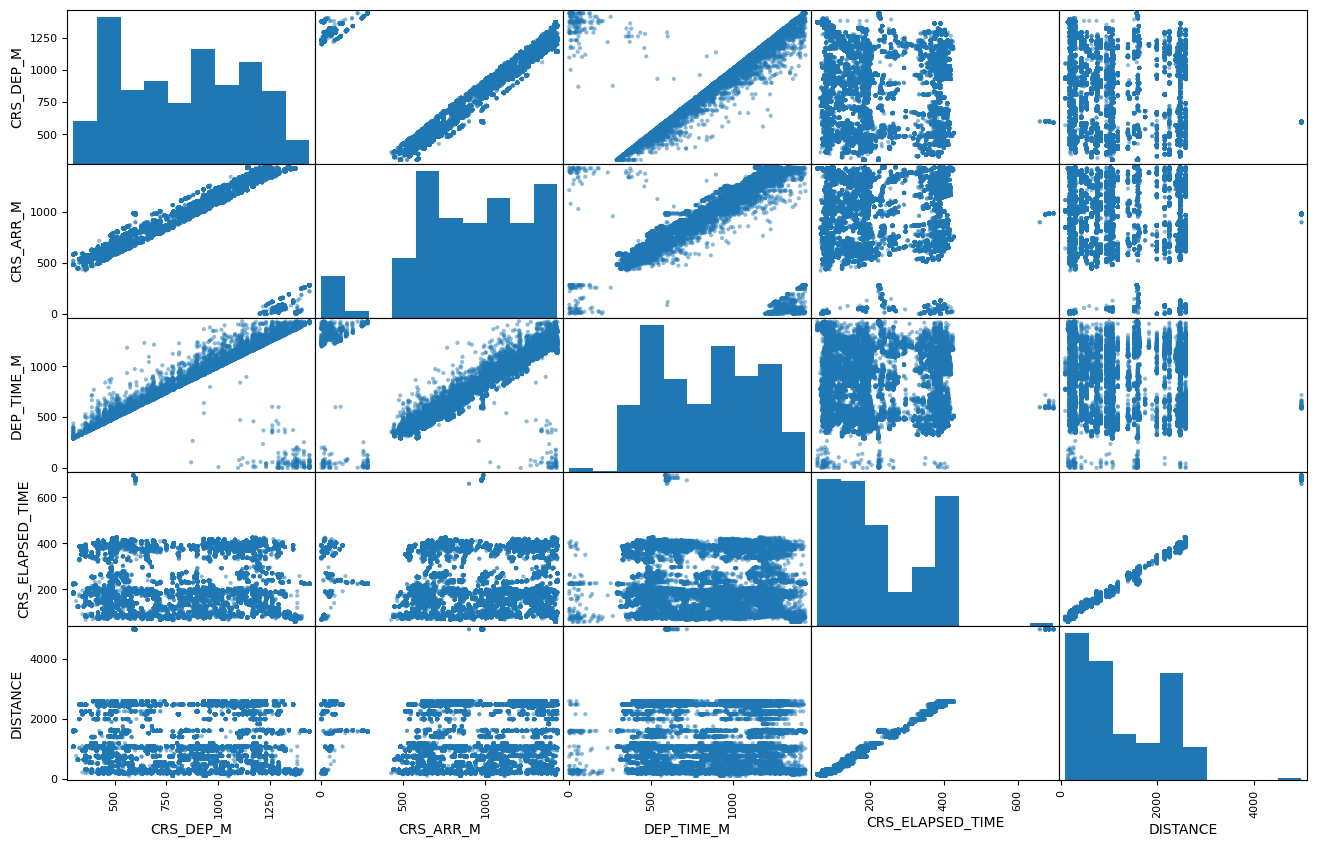

In [476]:
## further visualisation on variables that show relationship
attributes = ["CRS_DEP_M","CRS_ARR_M",'DEP_TIME_M',"CRS_ELAPSED_TIME",'DISTANCE']
scatter_matrix(data[attributes], figsize=(16,10))

In [477]:
## calculating for average departure delay time for flights in dataset
print(data['DEP_DELAY'].describe())

count    28820.000000
mean         6.374983
std         38.735144
min        -22.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64


Text(0, 0.5, 'minutes')

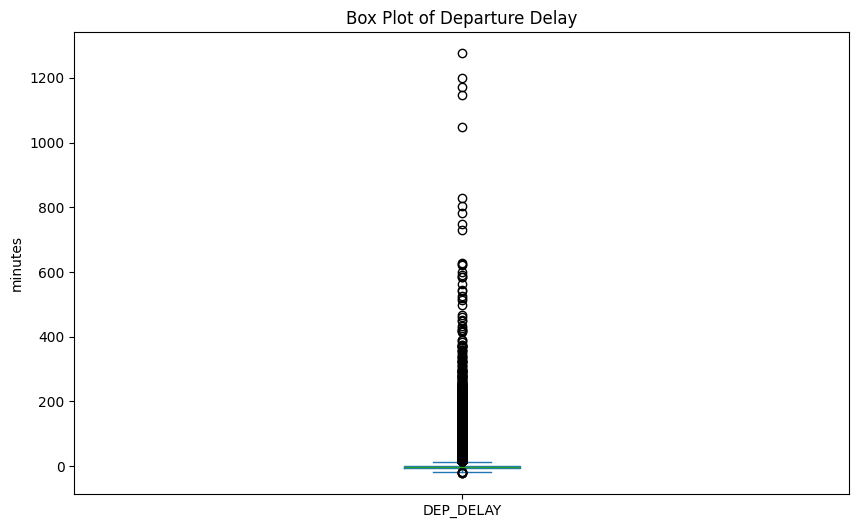

In [478]:
## representing DEP DELAY values on Box plot
data['DEP_DELAY'].plot(kind="box", figsize=(10,6))
plt.title('Box Plot of Departure Delay', loc='center')
plt.ylabel('minutes')

In [522]:
## Taxi_out statistics; mean and percentages in minutes
print(data["TAXI_OUT"].describe())

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64


Text(0.5, 0, 'Minutes')

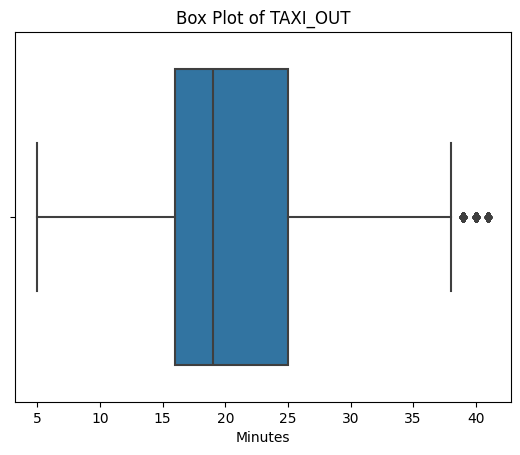

In [523]:
sns.boxplot(x=data["TAXI_OUT"])
plt.title('Box Plot of TAXI_OUT', loc="center")
plt.xlabel('Minutes')

In [479]:
## Destination with the highest flight frequency
print(data["DEST"].describe())

count     28820
unique       65
top         LAX
freq       2974
Name: DEST, dtype: object


<Axes: xlabel='DEST', ylabel='count'>

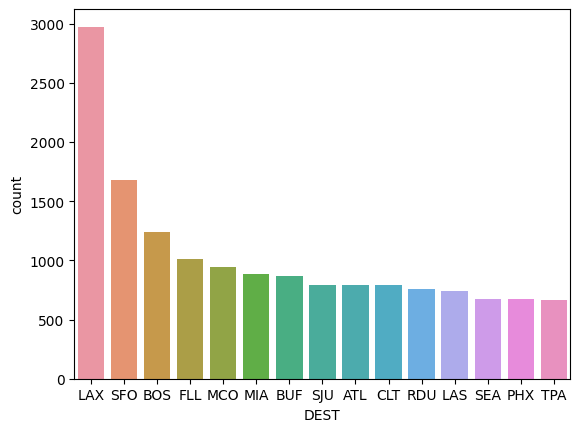

In [480]:
## Plot the frequency of the top 15 destinations in a barchart
sns.countplot(x='DEST', data=data, order=data['DEST'].value_counts().iloc[:15].index)

In [481]:
## exploratory data analysis
## correlation matrix

corr_mat = data.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


<Axes: >

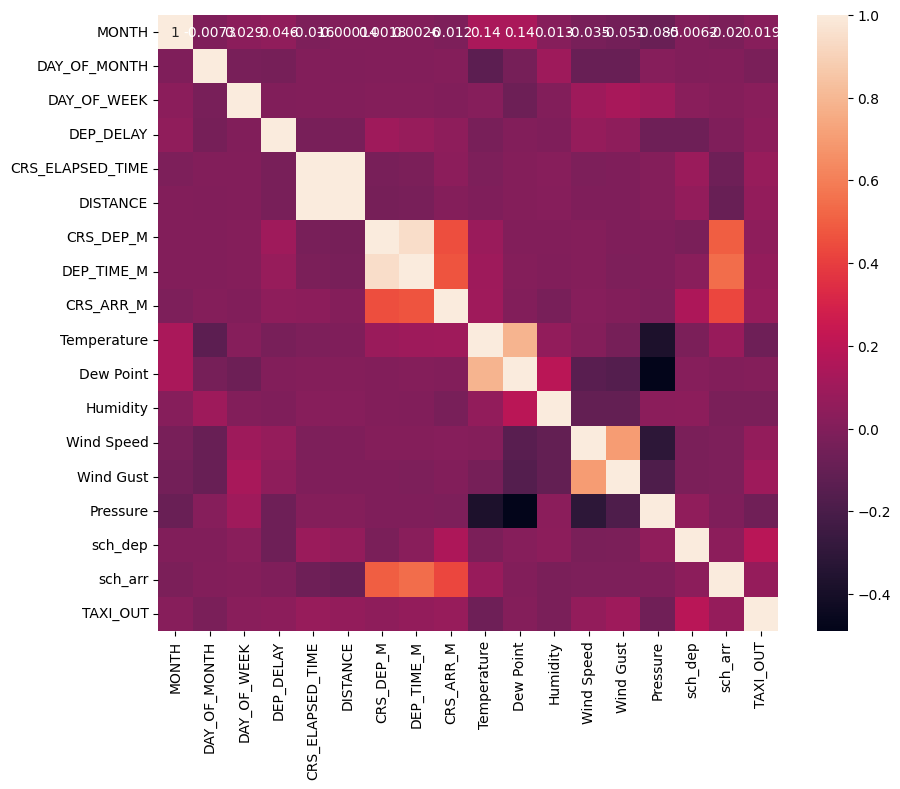

In [482]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)

In [483]:
## selecting my columns of interest for further analysis
data.drop(data.columns[[3, 4, 5, 15, 19]], axis=1, inplace=True)

In [484]:
## building our model
x = data.iloc[:, 0:17]
y = data.iloc[:, 17] ## or data['TAXI_OUT']

In [485]:
## splitting our data
## 85% for training, 15% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=28)

In [486]:
x_train.shape

(24497, 17)

In [487]:
x_test.shape

(4323, 17)

In [488]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [489]:
## LINEAR REGRESSION
lin_reg = LinearRegression()

In [490]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [491]:
y_pred = lin_reg.predict(x_test)

In [492]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

,Actual,Predicted
26281,15,14.128359
6990,40,21.746662
30,11,20.621307
28446,20,20.945083
18912,17,22.797472
...,...,...
26432,28,22.367522
9464,18,20.402732
12269,24,23.474792
22869,26,18.482828


In [493]:
## model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.282358608337459
MSE: 44.0567679584769
RMSE: 6.637527247286966
R2: 0.08818070928704169


In [494]:
#lin_reg.score(x_test, y_test)

In [495]:
lin_reg.coef_

array([ 0.27387747, -0.2507511 ,  0.19630945,  0.15292931,  3.59874584,
       -3.22954342,  0.00656045,  0.28172521,  0.13177554, -1.727082  ,
        1.45375012, -0.28069749,  0.07052509,  0.682539  , -0.23966067,
        1.14428309,  0.24972696])

In [496]:
## ridge regression and lasso modelling

## building our model
x0 = data.iloc[:, 0:17].values
y0 = data.iloc[:, 17].values

In [497]:
## splitting our data
## 85% for training, 15% for testing

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.15, random_state=28)

In [498]:
## define our model

model_ridge = Ridge(alpha=10, random_state=28)

## train our model

model_ridge.fit(x0_train, y0_train)

Ridge(alpha=10, random_state=28)

In [499]:
## make predictions
predict_ridge = model_ridge.predict(x0_test)
pd.DataFrame({'Actual': y0_test, 'Predicted': predict_ridge})

,Actual,Predicted
0,15,14.127903
1,40,21.745502
2,11,20.622071
3,20,20.945319
4,17,22.795082
...,...,...
4318,28,22.368667
4319,18,20.402021
4320,24,23.474360
4321,26,18.485099


In [500]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y0_test, predict_ridge))
print('MSE:', metrics.mean_squared_error(y0_test, predict_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y0_test, predict_ridge)))
print('R2:', metrics.r2_score(y0_test, predict_ridge))

MAE: 5.282372173274431
MSE: 44.056899350051424
RMSE: 6.637537144909355
R2: 0.08817798994611303


In [501]:
## define and train your model

model_lasso = Lasso(alpha=0.10, random_state=28)
model_lasso.fit(x0_train, y0_train)

Lasso(alpha=0.1, random_state=28)

In [502]:
## make predictions
predict_lasso = model_lasso.predict(x0_test)
pd.DataFrame({'Actual': y0_test, 'Predicted': predict_lasso})

,Actual,Predicted
0,15,14.268748
1,40,21.554021
2,11,20.667420
3,20,21.018065
4,17,22.538935
...,...,...
4318,28,22.490343
4319,18,20.239814
4320,24,23.437774
4321,26,18.904930


In [503]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y0_test, predict_lasso))
print('MSE:', metrics.mean_squared_error(y0_test, predict_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y0_test, predict_lasso)))
print('R2:', metrics.r2_score(y0_test, predict_lasso))

MAE: 5.2876479850233835
MSE: 44.11814599431714
RMSE: 6.642149199944032
R2: 0.08691040100755199


In [504]:
## tunning 
cv = RepeatedKFold(n_splits=6, n_repeats=1, random_state=32)

##define model

model = RidgeCV(alphas=(0.5,1,0.01), cv=cv, scoring='neg_mean_absolute_error')

## fit the model
model.fit(x0_train,y0_train)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=1, n_splits=6, random_state=32),
        scoring='neg_mean_absolute_error')

In [505]:
## summarize the chosen configuration
print('alpha: %.2f' % model.alpha_)

alpha: 1.00


In [510]:
## 2nd regression 
## using Encoding labels method

## Encode Labels to transform unusable data types

LE = LabelEncoder()
data_LE = pd.read_csv('M1_final.csv')
for x in data_LE.select_dtypes(["object_"]).columns:
    data_LE[x] = LE.fit_transform(data_LE[x]).astype("str")
data_LE

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,323,448,48,30,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,333,531,48,30,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,341,482,48,30,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,343,513,48,30,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,356,499,46,28,58,15,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,3,270,38,2,57,150,1370,1372,1427,39,34,96,4,6,0,30.18,0,20,32,19
28816,1,31,5,1,11,4,2,75,187,1390,1392,25,39,34,96,4,6,0,30.18,0,19,23,22
28817,1,31,5,2,975,55,283,392,2422,1125,1408,1337,39,34,96,4,6,0,30.18,0,19,23,21
28818,1,31,5,3,1935,58,5,224,1598,1417,1422,261,39,34,96,4,6,0,30.18,0,19,23,13


In [511]:
x1 = data_LE.iloc[:, 0:22]
y1 = data_LE.iloc[:, 22]

In [512]:
## splitting our data
## 85% for training, 15% for testing

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.15, random_state=28)

In [513]:
## standard scaler
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [514]:
## LINEAR REGRESSION
lin1_reg = LinearRegression()


In [515]:
lin1_reg.fit(x1_train, y1_train)

LinearRegression()

In [516]:
y1_pred = lin1_reg.predict(x1_test)

In [517]:
## create a dataframe for prediction
pd.DataFrame({'Actual': y1_test, 'Predicted':y1_pred})

,Actual,Predicted
26281,15,17.960464
6990,40,22.649758
30,11,19.814425
28446,20,21.235660
18912,17,21.926805
...,...,...
26432,28,21.765491
9464,18,20.713629
12269,24,22.120413
22869,26,18.401523


In [518]:
## model evealuation
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared --0.75, 0.82. 0.91, 0.97, 0.99, 1

print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('R2:', metrics.r2_score(y1_test, y1_pred))

MAE: 5.298744643987188
MSE: 44.436525975989724
RMSE: 6.66607275507774
R2: 0.08032106133244221


In [519]:
lin1_reg.score(x1_test, y1_test)

0.08032106133244221